In [161]:
#Import pandas,json and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)


In [162]:
# read the credit_card_default file and get the data in a pandas dataframe
df = pd.read_csv("credit_card_default.csv")

In [163]:
# convert categirocal variables to string
df['SEX'] = df['SEX'].map({1: 'male', 2: 'female'})
#df.head()

df['EDUCATION'] = df['EDUCATION'].map({1: 'graduate school', 2: 'university', 3:'high school', 4:'others'})

# Create a new Age range column
df['AGE_RANGE'] = pd.cut(df.AGE, bins=[20,29,39,49,59,69,79], labels=['20-29','30-39','40-49','50-59','60-69','70-79'])

df['MARRIAGE'] = df['MARRIAGE'].map({1: 'married', 2: 'single', 3:'others'})

df['AVG_6MNTH_BAL'] = (df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6'])/6

# Max missed payments
#cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df['MISSED_PYMTS'] = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].max(axis=1) 
df['BALANCE_TO_LIMIT'] = df['AVG_6MNTH_BAL']/df['LIMIT_BAL']
df.head()

# Create a dataframe with columns that are needed for analysis
new_df = df.filter(['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE_RANGE','MISSED_PYMTS','BALANCE_TO_LIMIT','default payment next month'], axis=1)
new_df.head(10)
df['LAST_PAY_AMT'] = pd.cut(df.PAY_AMT1, bins=[0,500,1000,1500,2000,10000,100000,1000000], labels=['0-500','500-1000','1000-1500','1500-2000','2000-10000','10000-100000','100000-1000000'])


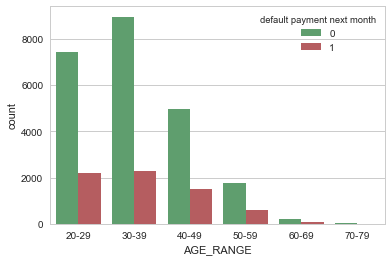

In [164]:
# Checking which age range tends to default more
sns.countplot(x="AGE_RANGE", hue="default payment next month", data=new_df, palette=["C1","C2"])
plt.show()

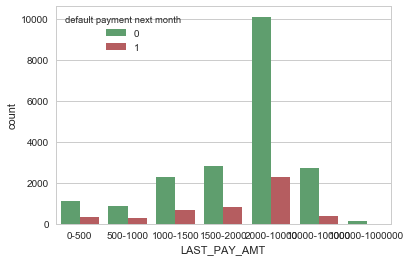

In [165]:
# Checking whether there is relationship between the last bill payment amount and default next month
sns.countplot(x="LAST_PAY_AMT", hue="default payment next month", data=df, palette=["C1","C2"])
plt.show()

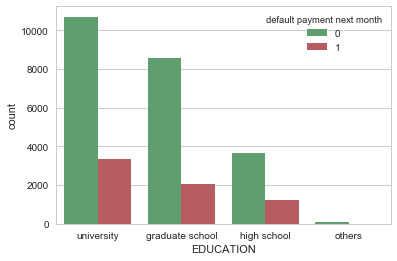

In [166]:
# Checking whether education has any impact on default
sns.countplot(x="EDUCATION", hue="default payment next month", data=new_df, palette=["C1","C2"])
plt.show()

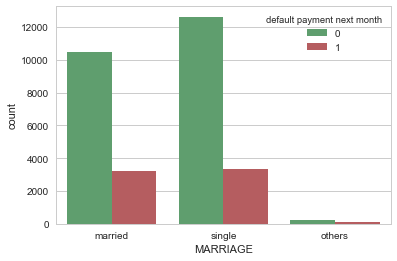

In [167]:
# Is there any relationship between marital status and default
sns.countplot(x="MARRIAGE", hue="default payment next month", data=new_df, palette=["C1","C2"])
plt.show()

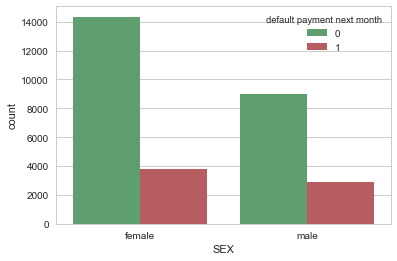

In [168]:
# Which gender tends to default more
sns.countplot(x="SEX", hue="default payment next month", data=new_df, palette=["C1","C2"])
plt.show()

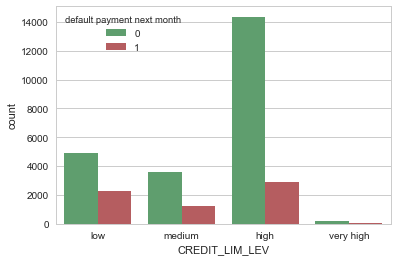

In [169]:
# Create a new column for credit limit level: low, medium, high, very high
# Does Credit limit play any role in default?
new_df['CREDIT_LIM_LEV'] = pd.cut(new_df.LIMIT_BAL, bins=[10000,50000,100000,500000,1000000], labels=['low','medium','high','very high'])
sns.countplot(x="CREDIT_LIM_LEV", hue="default payment next month", data=new_df, palette=["C1","C2"])
plt.show()


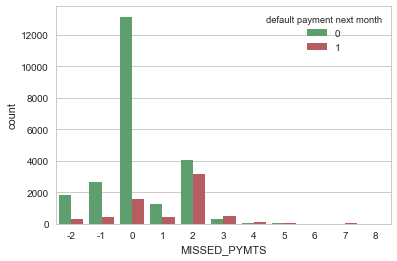

In [170]:
# Is a large number of missed payments a precurser to default?
sns.countplot(x="MISSED_PYMTS", hue="default payment next month", data=new_df, palette=["C1","C2"])
plt.show()

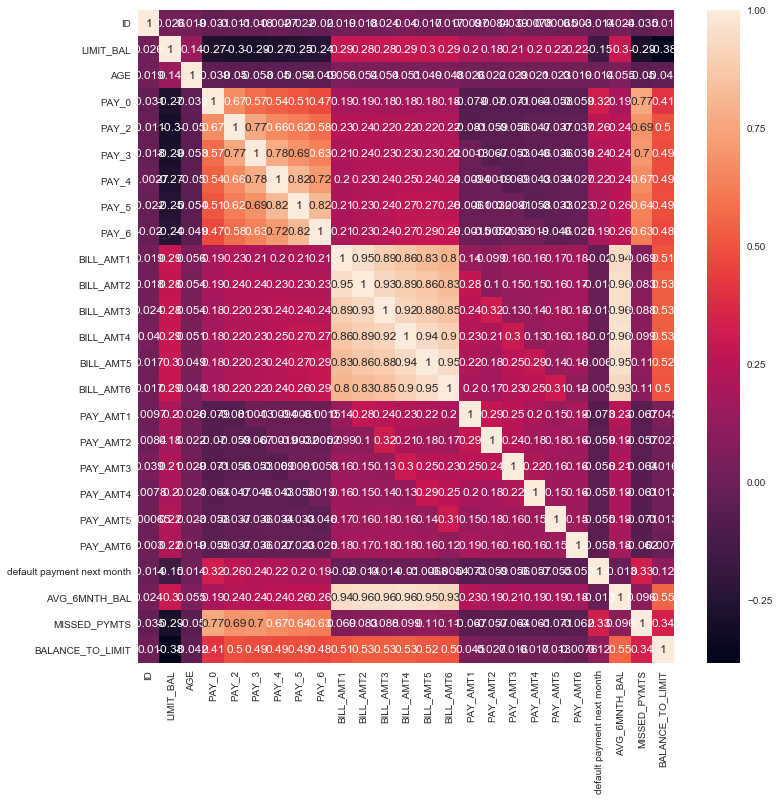

In [171]:
# What are the correlations between all columns?
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot =True)
plt.show()

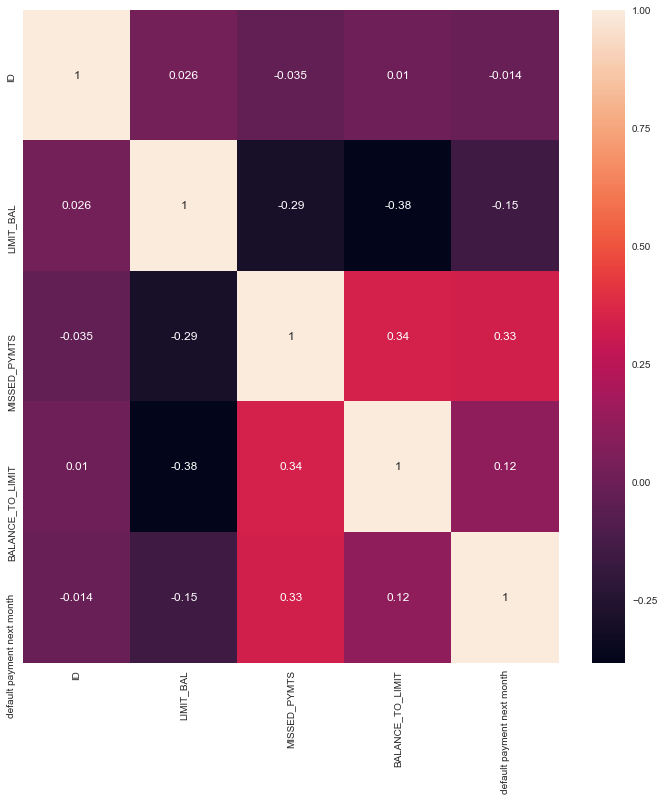

In [172]:
# What are the correlations in my dataframe of limited columns?
plt.figure(figsize=(12,12))
sns.heatmap(new_df.corr(), annot =True)
plt.show()

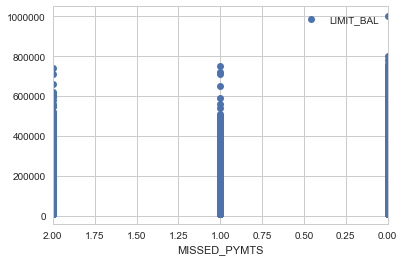

In [173]:
# Does credit limit has an impact on missed payments?
new_df.plot(x = 'MISSED_PYMTS', y ='LIMIT_BAL', style ='o')
plt.show()

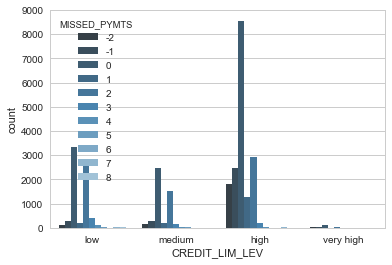

In [178]:
# Who have more missed payments? The ones with low credit limit or the ones with high credit limit?
sns.countplot(x="CREDIT_LIM_LEV", hue="MISSED_PYMTS", data=new_df,palette="Blues_d")
plt.show()